In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
df=pd.read_csv("CREDIT_CARD_FRAUD.csv")
df

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,350.91,22,Food,0,0,99,4,37,0
9996,9997,410.04,5,Clothing,0,0,70,3,25,0
9997,9998,527.75,21,Electronics,0,0,44,2,45,0
9998,9999,91.20,2,Electronics,0,0,38,0,37,0


In [18]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [19]:
df.tail()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
9995,9996,350.91,22,Food,0,0,99,4,37,0
9996,9997,410.04,5,Clothing,0,0,70,3,25,0
9997,9998,527.75,21,Electronics,0,0,44,2,45,0
9998,9999,91.20,2,Electronics,0,0,38,0,37,0
9999,10000,44.06,2,Clothing,0,0,38,0,66,0


In [20]:
df.columns

Index(['transaction_id', 'amount', 'transaction_hour', 'merchant_category',
       'foreign_transaction', 'location_mismatch', 'device_trust_score',
       'velocity_last_24h', 'cardholder_age', 'is_fraud'],
      dtype='object')

In [21]:
df.shape

(10000, 10)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["merchant_category"]=le.fit_transform(df["merchant_category"])
df

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,1,0,0,66,3,40,0
1,2,541.82,3,4,1,0,87,1,64,0
2,3,237.01,17,3,0,0,49,1,61,0
3,4,164.33,4,3,0,1,72,3,34,0
4,5,30.53,15,2,0,0,79,0,44,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,350.91,22,2,0,0,99,4,37,0
9996,9997,410.04,5,0,0,0,70,3,25,0
9997,9998,527.75,21,1,0,0,44,2,45,0
9998,9999,91.20,2,1,0,0,38,0,37,0


In [25]:
df.isnull()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [27]:
df.isnull().sum().sum()

np.int64(0)

In [28]:
x=df.drop('is_fraud',axis=1)
y=df['is_fraud']
x

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age
0,1,84.47,22,1,0,0,66,3,40
1,2,541.82,3,4,1,0,87,1,64
2,3,237.01,17,3,0,0,49,1,61
3,4,164.33,4,3,0,1,72,3,34
4,5,30.53,15,2,0,0,79,0,44
...,...,...,...,...,...,...,...,...,...
9995,9996,350.91,22,2,0,0,99,4,37
9996,9997,410.04,5,0,0,0,70,3,25
9997,9998,527.75,21,1,0,0,44,2,45
9998,9999,91.20,2,1,0,0,38,0,37


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: is_fraud, Length: 10000, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.00000000e+00, 5.74219600e-02, 9.56521739e-01, ...,
        5.54054054e-01, 3.33333333e-01, 4.31372549e-01],
       [1.00010001e-04, 3.68324451e-01, 1.30434783e-01, ...,
        8.37837838e-01, 1.11111111e-01, 9.01960784e-01],
       [2.00020002e-04, 1.61117305e-01, 7.39130435e-01, ...,
        3.24324324e-01, 1.11111111e-01, 8.43137255e-01],
       ...,
       [9.99799980e-01, 3.58759789e-01, 9.13043478e-01, ...,
        2.56756757e-01, 2.22222222e-01, 5.29411765e-01],
       [9.99899990e-01, 6.19969545e-02, 8.69565217e-02, ...,
        1.75675676e-01, 0.00000000e+00, 3.72549020e-01],
       [1.00000000e+00, 2.99515989e-02, 8.69565217e-02, ...,
        1.75675676e-01, 0.00000000e+00, 9.41176471e-01]])

In [31]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: is_fraud, Length: 10000, dtype: int64

In [32]:
df.describe

<bound method NDFrame.describe of       transaction_id  amount  transaction_hour  merchant_category  \
0                  1   84.47                22                  1   
1                  2  541.82                 3                  4   
2                  3  237.01                17                  3   
3                  4  164.33                 4                  3   
4                  5   30.53                15                  2   
...              ...     ...               ...                ...   
9995            9996  350.91                22                  2   
9996            9997  410.04                 5                  0   
9997            9998  527.75                21                  1   
9998            9999   91.20                 2                  1   
9999           10000   44.06                 2                  0   

      foreign_transaction  location_mismatch  device_trust_score  \
0                       0                  0                  66   
1

In [ ]:
df['is_fraud'].value_counts()

is_fraud
0    9849
1     151
Name: count, dtype: int64

In [55]:
df.duplicated().sum()

np.int64(0)

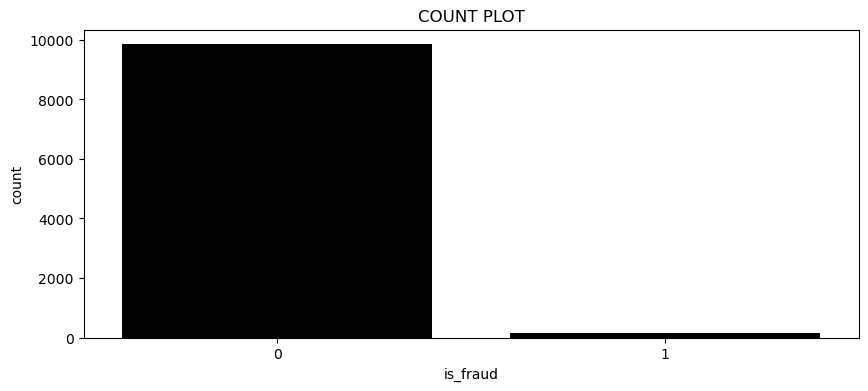

In [40]:
plt.figure(figsize=(10, 4))
sns.countplot(x="is_fraud", data=df,color='black') 
plt.title('COUNT PLOT')                     
plt.show()

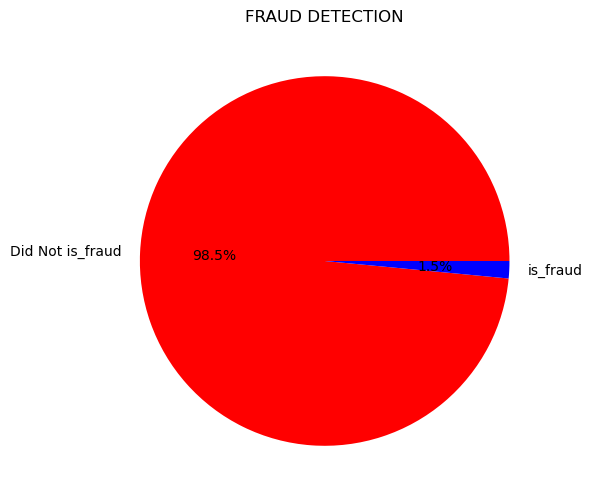

In [39]:
survival_counts = df['is_fraud'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(survival_counts, labels=['Did Not is_fraud', 'is_fraud'],colors=['red', 'blue'],autopct='%1.1f%%')
plt.title('FRAUD DETECTION')
plt.show()

In [42]:
 counts=df['is_fraud'].value_counts()
 counts

is_fraud
0    9849
1     151
Name: count, dtype: int64

In [57]:
from imblearn.under_sampling import RandomUnderSampler
x=df.drop('is_fraud',axis=1)
y=df['is_fraud']
smote=RandomUnderSampler()
x_smot,y_smote=smote.fit_resample(x,y)
x_smot.shape,y_smote.shape

((302, 9), (302,))

<function matplotlib.pyplot.show(close=None, block=None)>

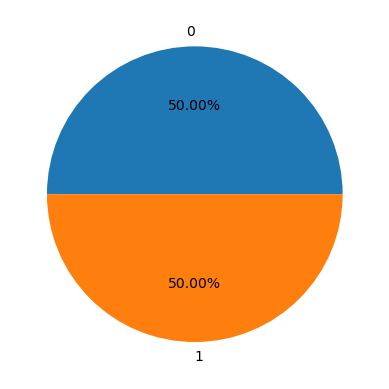

In [58]:
plt.pie(y_smote.value_counts(),labels=y_smote.value_counts().index,autopct='%1.2f%%')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

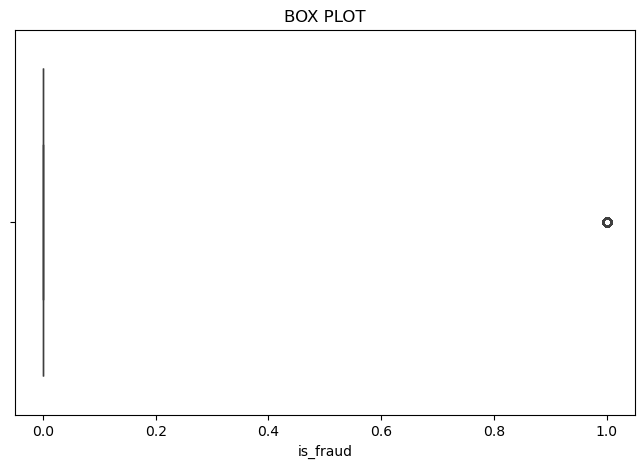

In [43]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_fraud', data=df)
plt.title('BOX PLOT')
plt.show

In [44]:
from imblearn.over_sampling import SMOTE
x = df.drop(columns="is_fraud", axis=1)
y = df["is_fraud"]
smote = SMOTE(sampling_strategy="minority")
x_sm, y_sm = smote.fit_resample(x, y)
print(x_sm.shape)
print(y_sm.shape)

(19698, 9)
(19698,)


In [45]:
y_sm.value_counts()

is_fraud
0    9849
1    9849
Name: count, dtype: int64

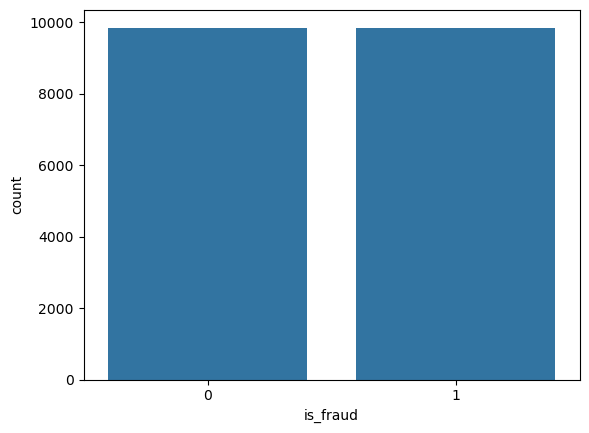

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=y_sm)
plt.show()

<Axes: xlabel='is_fraud', ylabel='Density'>

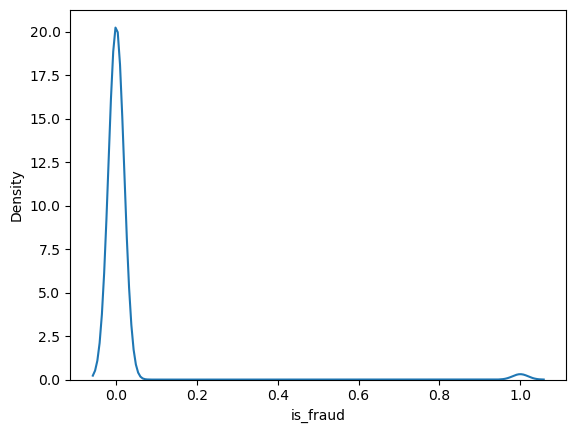

In [53]:
sns.kdeplot(df['is_fraud'])

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9885
[[1977    0]
 [  23    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1977
           1       0.00      0.00      0.00        23

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.98      0.99      0.98      2000



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9885
[[1977    0]
 [  23    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1977
           1       0.00      0.00      0.00        23

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.98      0.99      0.98      2000



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
model=SVC(C=100,kernel ="rbf",gamma=0.3,shrinking=False,break_ties=True)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9885
[[1977    0]
 [  23    0]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1977
           1       0.00      0.00      0.00        23

    accuracy                           0.99      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.98      0.99      0.98      2000



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
model=SVC(C=10,kernel="rbf",gamma=0.3,shrinking=True)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[2958    0]
 [   0   42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00        42

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=47)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00        42

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [62]:
model=RandomForestClassifier()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00        42

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [64]:
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00        42

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [65]:
model.fit(x_test,y_test)
y_pred=model.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2958
           1       1.00      1.00      1.00        42

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [67]:
rf_param={
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],                  
    'min_samples_split':[2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10]
}
from sklearn.model_selection import RandomizedSearchCV
rf_model=RandomForestClassifier()
rf_cv=RandomizedSearchCV(rf_model,rf_param,cv=5)
rf_cv.fit(x_train,y_train)
rf_cv.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 7}

In [68]:
rf_model=RandomForestClassifier(n_estimators=60,min_samples_split=7,min_samples_leaf=4,max_depth=10)
model=rf_model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2958
           1       1.00      0.52      0.69        42

    accuracy                           0.99      3000
   macro avg       1.00      0.76      0.84      3000
weighted avg       0.99      0.99      0.99      3000



In [69]:
rf_model=RandomForestClassifier(n_estimators=60,min_samples_split=7,min_samples_leaf=4,max_depth=10)
model=rf_model.fit(x_test,y_test)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2958
           1       1.00      0.55      0.71        42

    accuracy                           0.99      3000
   macro avg       1.00      0.77      0.85      3000
weighted avg       0.99      0.99      0.99      3000



In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       0.00      0.00      0.00        42

    accuracy                           0.99      3000
   macro avg       0.49      0.50      0.50      3000
weighted avg       0.97      0.99      0.98      3000



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [71]:
knn=KNeighborsClassifier()
knn.fit(x_test,y_test)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       0.00      0.00      0.00        42

    accuracy                           0.99      3000
   macro avg       0.49      0.50      0.50      3000
weighted avg       0.97      0.99      0.98      3000



c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [72]:
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10)
knn=KNeighborsClassifier()
cross_val_score(knn,x,y,cv=kfold)
print(cross_val_score(knn,x,y,cv=kfold))
print(cross_val_score(knn,x,y,cv=kfold).mean())

[0.984 0.985 0.987 0.978 0.988 0.98  0.985 0.986 0.988 0.988]
0.9848999999999999
